In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

### Create Dataset

In [3]:
# Initializing Seed for consistent results everytime
np.random.seed(42)
pts = 50

# Create a dataset of 50 points
x_vals = np.random.rand(50)
x_train = np.asarray(x_vals,dtype=np.float32).reshape(-1,1)
m = 1
alpha = np.random.rand(1)
beta = np.random.rand(1)
y_correct = np.asarray([2*i+m for i in x_vals], dtype=np.float32).reshape(-1,1)

### Using Pytorch

A model can be defined in PyTorch by subclassing the `torch.nn.Module` class. The model is defined in two steps. We first specify the parameters of the model, and then outline how they are applied to the inputs. For operations that do not involve trainable parameters (activation functions such as ReLU, operations like maxpool), we generally use the `torch.nn.functional` module.

In [4]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):
        # initialize our superclass 
        super(LinearRegressionModel, self).__init__() 
        """
        In the constructor we instantiate a nn.Linear module and assign it as a
        member variable.
        """
        self.linear = nn.Linear(input_dim, output_dim)
        

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must 
        return a Variable of output data. We can use Modules defined in the 
        constructor as well as arbitrary operators on Variables.
        """
        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1

### Create Model
Using the LinearRegressionModel class that we've defined above, we will create an instance of that class. We will pass 2 arguments to the initialization method of this class that will define the number of nodes in the model. 

### Select Loss Criteria
We will define a loss function using the built-in functiosn that are contained in Pytorchs' 'nn' module. This module also contains other helpful loss functions such as cross-entropy loss (see torch.nn.CrossEntropyLoss()). 

### Choose hyperparameters 
For this simple model, there are only 2 hyperparameters to set; 1) the learning rate for SGD and 2) the number of epochs (or # of times the model sees the training data). 

**Learning Rate:** A high learning rate raises the possibility that the model might not converge (although the training process is completed quickly) and a low learning rate ensures that the model will converge but is likely to result in long training times. 

**Number of Epochs:** We want to have the largest number of epochs possible _before_ the testing error begins to decrease. As a result, if choosing the number of epochs empirically we want to use the training error to do so. 

**Other Hyperparameters:** 1) _Batch Size_ is the number of training examples passed to the model for every update in the model parameters. _This is specific to a type of training procedure called Mini-Batch Gradient Descent. SGD computes the error (and updates model parameters) using only 1 training example._ 2) It is common to simply add to the _number of hidden layers_ until the test error does not subsequently improve. Likewise, 3) adding _a large number of hidden units_ and using a regularization technique (most commonly, node dropout) to prevent overfitting

In [19]:
# create a linear model
model = LinearRegressionModel(input_dim, output_dim)

# use Mean Squared Error for the loss
criterion = nn.MSELoss() # Mean Squared Loss

# create an optimizer object using Stochastic Gradient Descent
l_rate = 0.01 
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

epochs = 10000

### Train the Model
1. Learning machines like feedforward neural nets that use iterative algorithms often need many epochs during their learning phase. During each epoch, **we'll pass each instance in the dataset through the network exactly 1 time because we are using _Stochastic Gradient Descent_.**

2. We will then **estimate the loss**, which indicates the magnitude of difference between the model outputs (Y_hat) and the true values (Y). 

3. We then **compute the gradient of the loss function**; this tells us how much the loss function would change with corresponding changes in the model parameters. 

4. With this gradient in hand, we then **update the parameters using our learning rate.** 

In [21]:
for epoch in range(epochs):
    epoch +=1
    
    # create torch tensors
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_correct)

    # clear gradients before each epoch
    optimiser.zero_grad()
    
    # forward pass through the model to compute loss
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    
    # compute the gradient of the loss function
    loss.backward()
    
    # update model parameters using 
    optimiser.step()
    
    if epoch%1000 is 0:
        print('epoch {}, loss {}'.format(epoch,loss.data))

epoch 1000, loss 0.005116411484777927
epoch 2000, loss 0.00034444115590304136
epoch 3000, loss 2.318846236448735e-05
epoch 4000, loss 1.5614102721883683e-06
epoch 5000, loss 1.0572718167622952e-07
epoch 6000, loss 7.58362261876755e-09
epoch 7000, loss 5.361749932930593e-10
epoch 8000, loss 5.361749932930593e-10
epoch 9000, loss 5.361749932930593e-10
epoch 10000, loss 5.361749932930593e-10


Empirically we can see that the model training required 7000 epochs for the loss function to converge . 

Using a smaller number (~2000) obviously decreased the _training error_ but did not converge, **however this may be preferable because using a large number of epochs is likely going to overfit the model**.  

### Printing the predictions
We can pass more data through the model (now that it has been trained over 7000 epochs) and get predictions. 

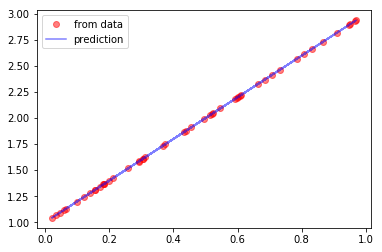

OrderedDict([('linear.weight', tensor([[2.0001]])), ('linear.bias', tensor([1.0000]))])


In [25]:
predicted = model.forward(torch.from_numpy(x_train)).data.numpy()

plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = .5, color = 'red')
plt.plot(x_train, predicted, label = 'prediction', alpha = 0.5, color = 'blue')
plt.legend()
plt.show()
print(model.state_dict())

Note that it is typically easier to work with `np.array` objects for visualization and other types of analysis compared to the `torch.tensor` objects. Pytorch supports easy transformation of `torch.tensor` into a Numpy format using `tensor.data.numpy()` and vice-versa using `torch.from_numpy(array)`.